<a href="https://colab.research.google.com/github/kamalatha/Bootcamp/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/FordA_TRAIN.tsv")
    ipython.magic("sx wget https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/FordA_TEST.tsv")
    return

setup()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, InputLayer, Conv1D, ReLU, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

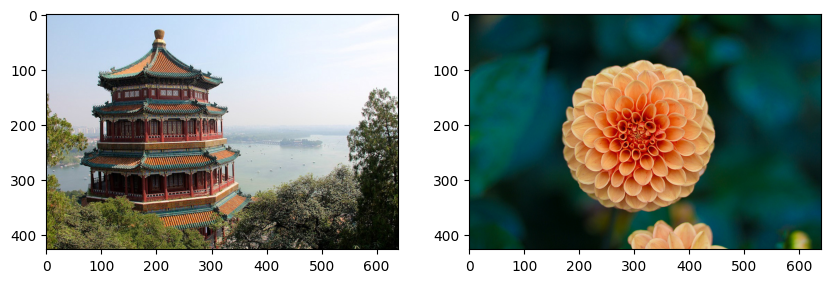

((427, 640, 3), (427, 640, 3))

In [3]:
# Load sample images
china = datasets.load_sample_image("china.jpg")
flower = datasets.load_sample_image("flower.jpg")

# Scale image features
china = china / 255
flower = flower / 255

# Visualize images
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(china)
ax[1].imshow(flower)
plt.show()
china.shape, flower.shape

In [4]:
# Combine images as single 4D array
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
batch_size, height, width, channels

(2, 427, 640, 3)

In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# vertical line
filters[:, 3, :, 0] = 1
# horizontal line
filters[3, :, :, 1] = 1
filters.shape

(7, 7, 3, 2)

In [6]:
# Convolutional layer
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

1st feature map through verticle filter


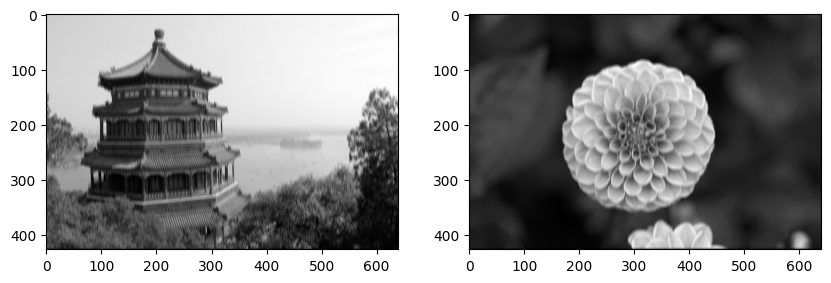

In [7]:
# Images' 1st feature map using vertical filter
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(outputs[0, :, :, 0], cmap="gray")
ax[1].imshow(outputs[1, :, :, 0], cmap="gray")
print("1st feature map through verticle filter")
plt.show()

2nd feature map through horizontal filter


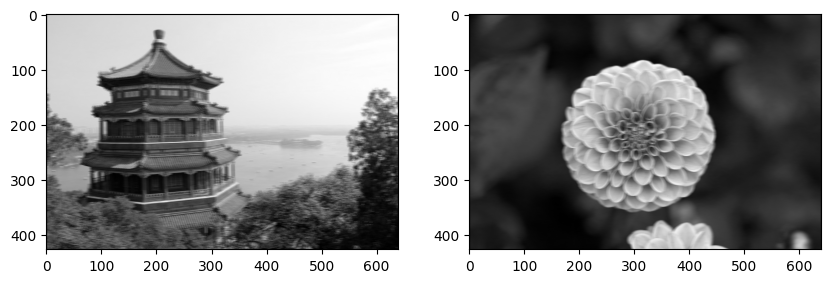

In [8]:
# Images' 2nd feature map using horizontal filter
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(outputs[0, :, :, 1], cmap="gray")
ax[1].imshow(outputs[1, :, :, 1], cmap="gray")
print("2nd feature map through horizontal filter")
plt.show()

In [9]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

In [10]:
# Pooling layer
max_pool = keras.layers.MaxPool2D(pool_size=2, padding="valid", dtype='float64')(images)

Images before and after pooling operation:


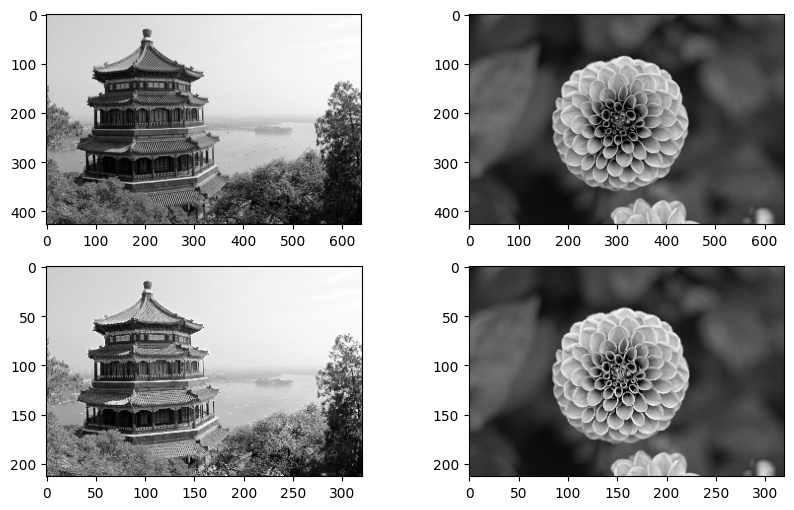

In [11]:
# Images before and after pooling operation, showing only single channel
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0][0].imshow(images[0, :, :, 1], cmap="gray")
ax[0][1].imshow(images[1, :, :, 1], cmap="gray")

ax[1][0].imshow(max_pool[0, :, :, 1], cmap="gray")
ax[1][1].imshow(max_pool[1, :, :, 1], cmap="gray")

print("Images before and after pooling operation:")
plt.show()

In [12]:
# Compression ratio
original_bytes = images.nbytes
pooling_bytes = np.array(max_pool).nbytes
ratio = pooling_bytes / original_bytes
print("The compression ratio between the original images size and the total size after pooling is:", ratio)

The compression ratio between the original images size and the total size after pooling is: 0.24941451990632318
